<a href="https://colab.research.google.com/github/Takion22/Blue-team/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Pr√©sentation du dataset Iris
Le dataset Iris est une r√©f√©rence dans le domaine de la classification. Il a √©t√© introduit par Ronald Fisher en 1936 et contient des informations sur trois esp√®ces de fleurs : Iris setosa, Iris versicolor et Iris virginica. Les donn√©es incluent quatre mesures pour chaque fleur (longueur et largeur des s√©pales, longueur et largeur des p√©tales), et l‚Äôobjectif est de d√©terminer √† quelle esp√®ce appartient une fleur √† partir de ces caract√©ristiques.

2) Visualisation

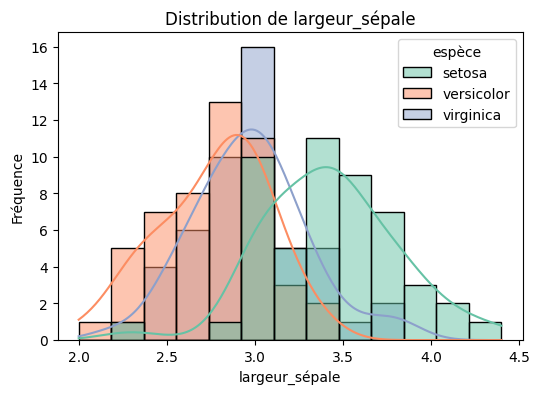

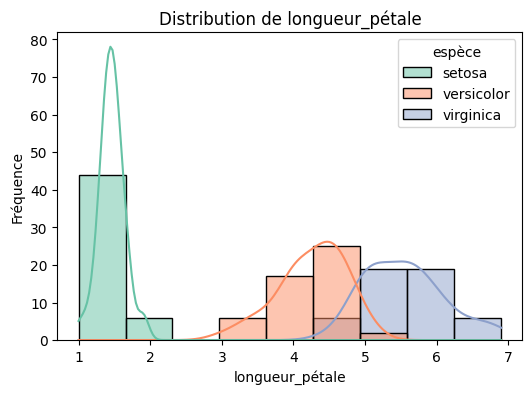

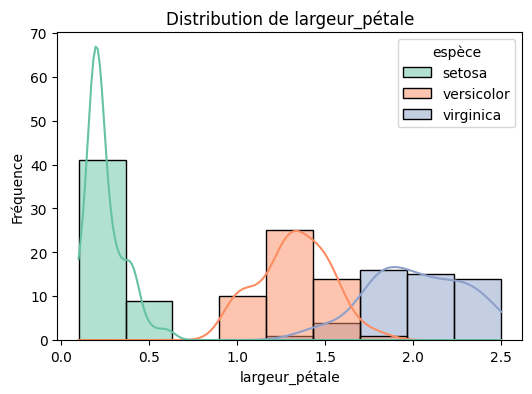

<ipython-input-5-f9d8cff3c0bf>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iris, x="esp√®ce", y="longueur_s√©pale", palette="pastel")


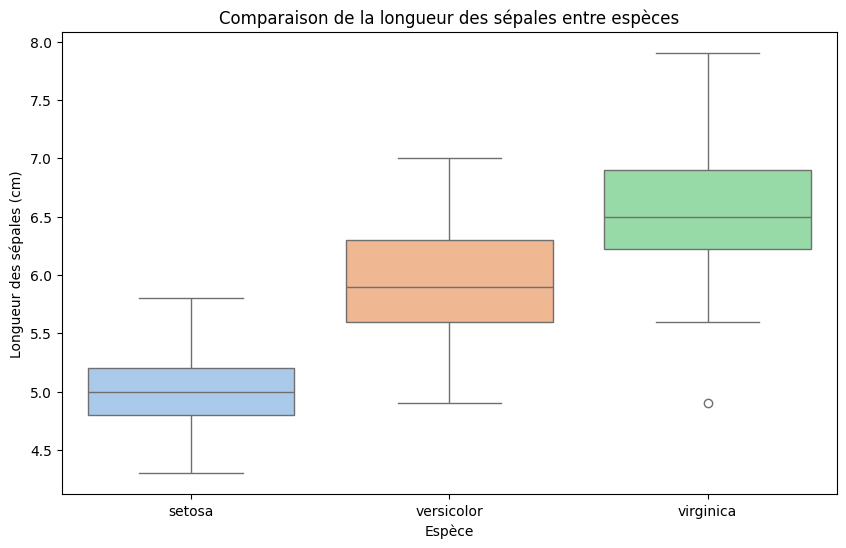

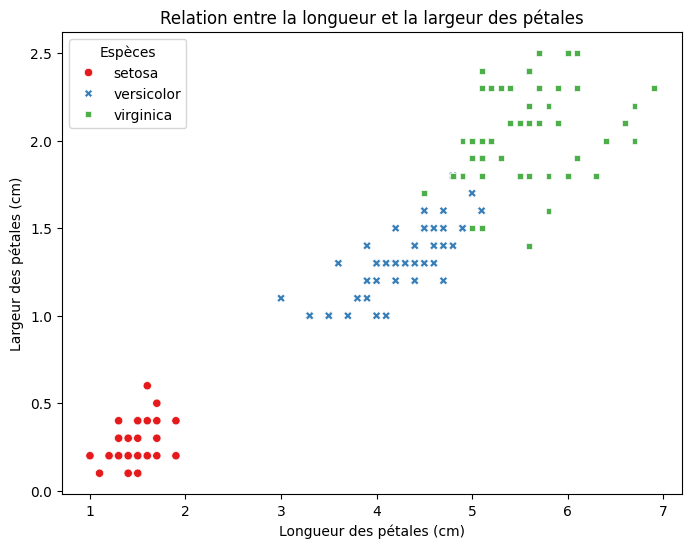

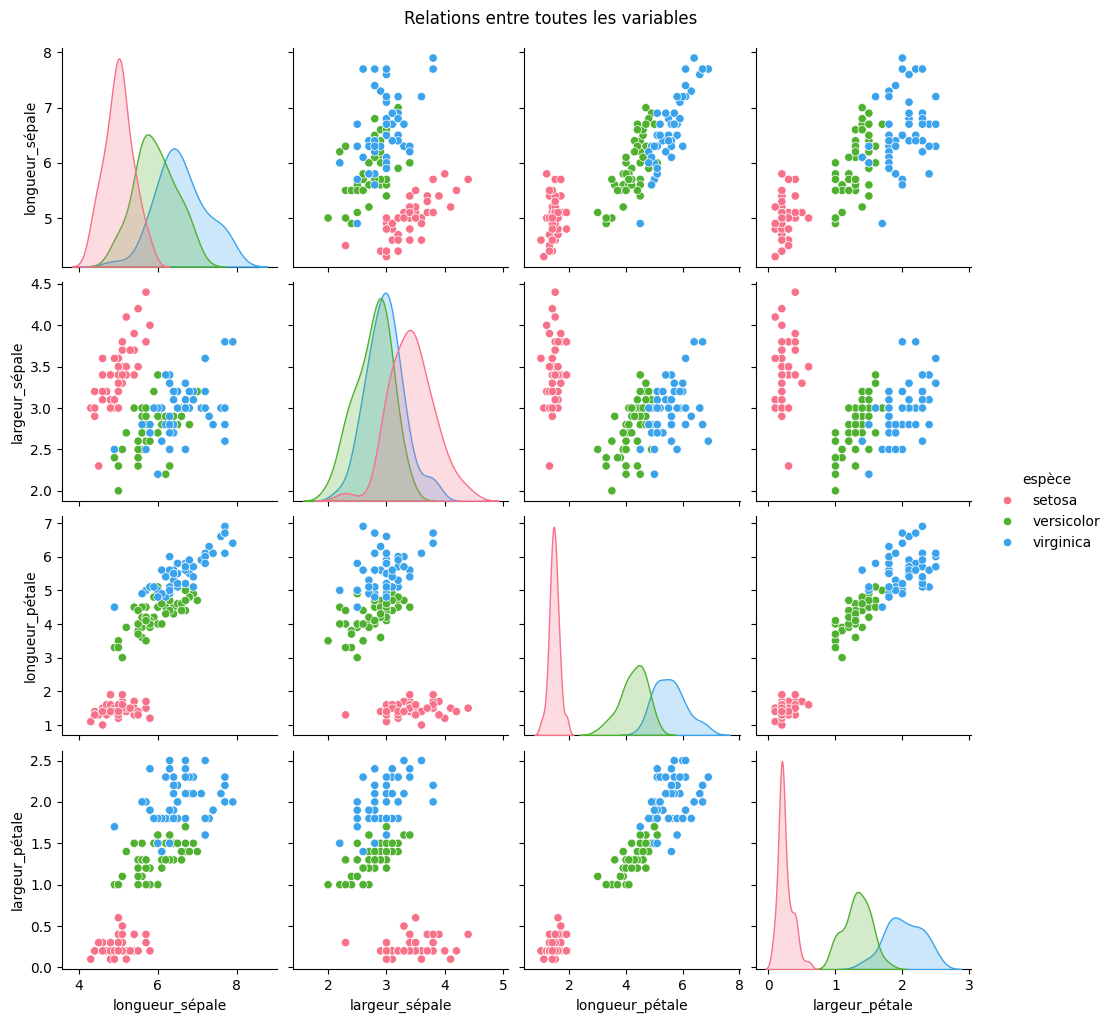

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]
)
df_iris['esp√®ce'] = iris.target
df_iris['esp√®ce'] = df_iris['esp√®ce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. Histogrammes pour chaque variable
for colonne in ["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_iris, x=colonne, hue="esp√®ce", kde=True, palette="Set2")
    plt.title(f"Distribution de {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Fr√©quence")
    plt.show()

# 2. Bo√Ætes √† moustaches pour comparer les esp√®ces
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x="esp√®ce", y="longueur_s√©pale", palette="pastel")
plt.title("Comparaison de la longueur des s√©pales entre esp√®ces")
plt.xlabel("Esp√®ce")
plt.ylabel("Longueur des s√©pales (cm)")
plt.show()

# 3. Scatter plot pour visualiser les relations entre deux variables
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_iris,
    x="longueur_p√©tale",
    y="largeur_p√©tale",
    hue="esp√®ce",
    style="esp√®ce",
    palette="Set1"
)
plt.title("Relation entre la longueur et la largeur des p√©tales")
plt.xlabel("Longueur des p√©tales (cm)")
plt.ylabel("Largeur des p√©tales (cm)")
plt.legend(title="Esp√®ces")
plt.show()

# 4. Pairplot pour explorer toutes les relations
sns.pairplot(df_iris, hue="esp√®ce", palette="husl", diag_kind="kde")
plt.suptitle("Relations entre toutes les variables", y=1.02)
plt.show()

# 5. Heatmap pour visualiser la corr√©lation entre les variables
plt.figure(figsize=(8, 6))
matrice_corr = df_iris.iloc[:, :-1].corr()
sns.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corr√©lations entre les variables")
plt.show()


3) Observations importantes

√Ä partir des graphiques, on peut noter par exemple que la longueur et la largeur des p√©tales permettent de bien diff√©rencier les esp√®ces, tandis que les s√©pales montrent un peu plus de chevauchements. Ces observations guideront le choix des mod√®les et des approches.

4) a- R√©gression logistique


Matrice de confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



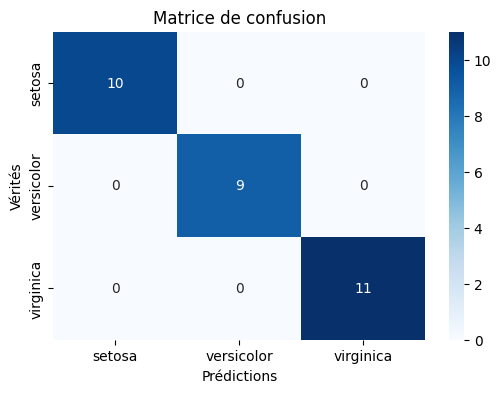

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]
)
df_iris['esp√®ce'] = iris.target
df_iris['esp√®ce'] = df_iris['esp√®ce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. S√©parer les donn√©es en features (X) et en labels (y)
X = df_iris[["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]]
y = df_iris["esp√®ce"]

# 2. Diviser le dataset en donn√©es d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Cr√©er le mod√®le de r√©gression logistique et l'entra√Æner
modele = LogisticRegression(max_iter=200)
modele.fit(X_train, y_train)

# 4. Faire des pr√©dictions sur le jeu de test
y_pred = modele.predict(X_test)

# 5. √âvaluer les performances du mod√®le
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# 6. Visualisation de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=modele.classes_, yticklabels=modele.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.show()


4)- b KNN

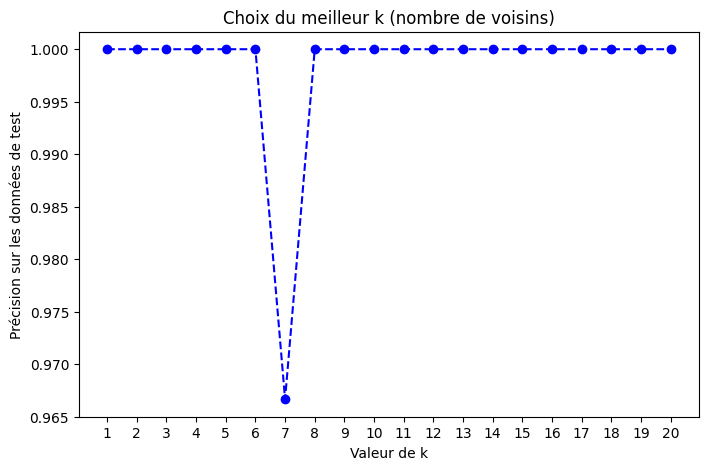

Meilleure valeur pour k : 1
Matrice de confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



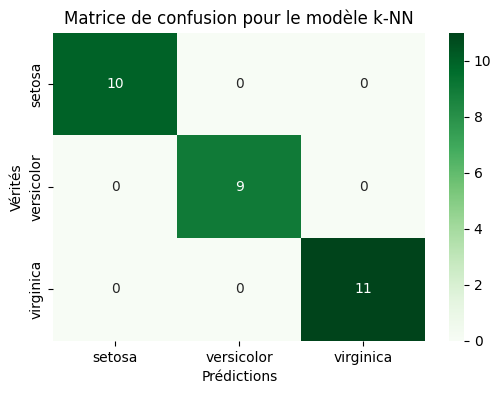

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]
)
df_iris['esp√®ce'] = iris.target
df_iris['esp√®ce'] = df_iris['esp√®ce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. S√©parer les donn√©es en features (X) et en labels (y)
X = df_iris[["longueur_s√©pale", "largeur_s√©pale", "longueur_p√©tale", "largeur_p√©tale"]]
y = df_iris["esp√®ce"]

# 2. Diviser le dataset en donn√©es d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. D√©terminer la meilleure valeur pour k (nombre de voisins)
scores = []
k_values = range(1, 21)  # Tester les valeurs de k de 1 √† 20

for k in k_values:
    modele_knn = KNeighborsClassifier(n_neighbors=k)
    modele_knn.fit(X_train, y_train)
    scores.append(modele_knn.score(X_test, y_test))

# Visualisation des scores pour choisir le meilleur k
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='b')
plt.title("Choix du meilleur k (nombre de voisins)")
plt.xlabel("Valeur de k")
plt.ylabel("Pr√©cision sur les donn√©es de test")
plt.xticks(k_values)
plt.show()

# 4. Utiliser la meilleure valeur de k pour cr√©er le mod√®le
meilleur_k = k_values[scores.index(max(scores))]
print(f"Meilleure valeur pour k : {meilleur_k}")

modele_knn = KNeighborsClassifier(n_neighbors=meilleur_k)
modele_knn.fit(X_train, y_train)

# 5. Faire des pr√©dictions sur le jeu de test
y_pred = modele_knn.predict(X_test)

# 6. √âvaluer les performances du mod√®le
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# 7. Visualisation de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Greens", xticklabels=modele_knn.classes_, yticklabels=modele_knn.classes_)
plt.title("Matrice de confusion pour le mod√®le k-NN")
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.show()


5) Comparaison

R√©gression logistique

Forces :

  - La r√©gression logistique montre des performances √©quilibr√©es sur toutes les classes.

  - Tr√®s peu d'erreurs dans la distinction entre les esp√®ces virginica et versicolor, qui sont souvent difficiles √† s√©parer.

KNN :

Forces :

  - Bonne diff√©renciation pour la classe Setosa, qui est la plus distincte.

  - Performances l√©g√®rement meilleures que la r√©gression logistique pour certaines observations ambigu√´s.

Limites :


  - Quelques erreurs suppl√©mentaires dans la distinction entre virginica et versicolor.

  - La performance d√©pend fortement du choix de
ùëò
k (ici
ùëò
=
5
k=5 a √©t√© choisi apr√®s optimisation).

Conclusion :  la r√©gression logistique semble √™tre le mod√®le le plus adapt√© pour le dataset Iris.